# 多层感知机测试效果

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l
from Model import *
from Trainer import *
from torchinfo import summary
import os

### 加载数据

In [2]:
mydir = os.getcwd() + '\\data01'

# 读取本地文件
train_features = torch.load('{}/train_features.pt'.format(mydir))
test_features = torch.load('{}/test_features.pt'.format(mydir))
train_labels = torch.load('{}/train_labels.pt'.format(mydir))
test_data = pd.read_csv('{}/test_data.csv'.format(mydir))

In [3]:
print("train_features.shape: ", train_features.shape)
print("test_features.shape: ", test_features.shape)
print("train_labels.shape: ", train_labels.shape)
print("test_data.shape: ", test_data.shape)

train_features.shape:  torch.Size([1460, 331])
test_features.shape:  torch.Size([1459, 331])
train_labels.shape:  torch.Size([1460, 1])
test_data.shape:  (1459, 81)


### 定义损失函数

In [4]:
def squared_loss(preds, labels):  #@save
    """均方损失。"""
    return (preds - labels.reshape(preds.shape)) ** 2

def log_rmse(preds, labels):  #@save
    """对数均方根误差。"""
    return squared_loss(torch.log(preds+1), torch.log(labels+1)).mean()

In [5]:
# 定义超参数
learning_rate = 0.01 # 学习率
input_size = train_features.shape[-1]
hidden_size = 256
output_size = 1
model=MLP3(input_size, hidden_size, output_size)
loss_fn=log_rmse
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # Adam优化器
# optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate) # 随机梯度下降优化器，学习率为0.01

In [6]:
summary(model, input_size=(64,331))

Layer (type:depth-idx)                   Output Shape              Param #
MLP3                                     [64, 1]                   --
├─Linear: 1-1                            [64, 256]                 84,992
├─ReLU: 1-2                              [64, 256]                 --
├─Linear: 1-3                            [64, 256]                 65,792
├─ReLU: 1-4                              [64, 256]                 --
├─Linear: 1-5                            [64, 1]                   257
Total params: 151,041
Trainable params: 151,041
Non-trainable params: 0
Total mult-adds (M): 9.67
Input size (MB): 0.08
Forward/backward pass size (MB): 0.26
Params size (MB): 0.60
Estimated Total Size (MB): 0.95

In [7]:
mytrainer = Trainer(
    model= model, # 模型
    X=train_features, # 特征
    y=train_labels, # 标签
    num_epochs=100, # 迭代次数
    batch_size=16, # 批次大小为16
    loss_fn= loss_fn, # 损失函数
    optimizer= optimizer, # 优化器
    n_splits=5, # 子集个数
    is_print=True,
    print_every=10
)

In [8]:
mytrainer.train()

Fold 0
Epoch | 10/100 | Train Loss: 0.0273 | Test Loss: 0.0243
Epoch | 20/100 | Train Loss: 0.0155 | Test Loss: 0.0156
Epoch | 30/100 | Train Loss: 0.0122 | Test Loss: 0.0162
Epoch | 40/100 | Train Loss: 0.0103 | Test Loss: 0.0179
Epoch | 50/100 | Train Loss: 0.0089 | Test Loss: 0.0191
Epoch | 60/100 | Train Loss: 0.0075 | Test Loss: 0.0195
Epoch | 70/100 | Train Loss: 0.0060 | Test Loss: 0.0191
Epoch | 80/100 | Train Loss: 0.0047 | Test Loss: 0.0192
Epoch | 90/100 | Train Loss: 0.0035 | Test Loss: 0.0196
Epoch | 100/100 | Train Loss: 0.0034 | Test Loss: 0.0201
Fold 1
Epoch | 10/100 | Train Loss: 0.0187 | Test Loss: 0.0252
Epoch | 20/100 | Train Loss: 0.0136 | Test Loss: 0.0213
Epoch | 30/100 | Train Loss: 0.0111 | Test Loss: 0.0204
Epoch | 40/100 | Train Loss: 0.0096 | Test Loss: 0.0203
Epoch | 50/100 | Train Loss: 0.0084 | Test Loss: 0.0206
Epoch | 60/100 | Train Loss: 0.0073 | Test Loss: 0.0211
Epoch | 70/100 | Train Loss: 0.0062 | Test Loss: 0.0217
Epoch | 80/100 | Train Loss: 0.00

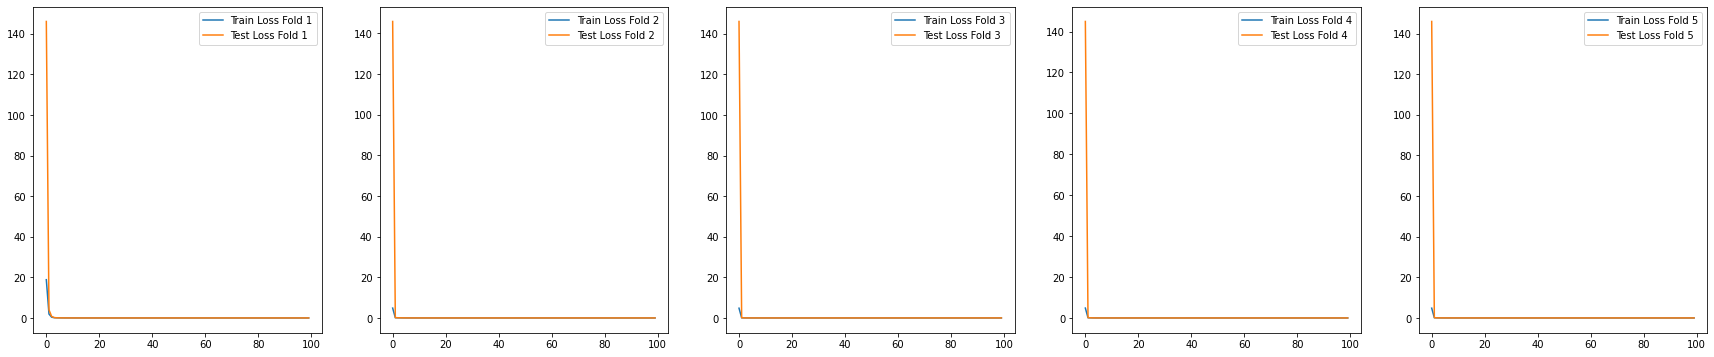

In [9]:
mytrainer.visualize()

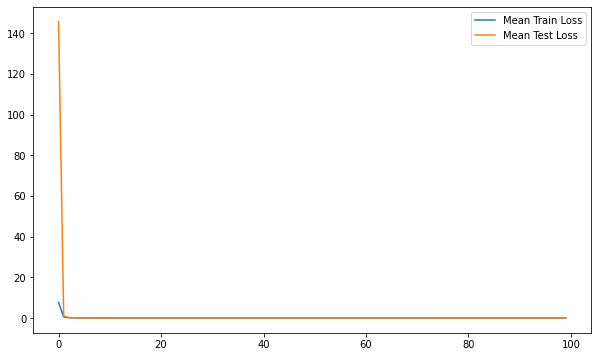

In [10]:
mytrainer.plot_mean_loss()

In [11]:
print("last mean test loss",mytrainer.mean_test_losses[-1])

last mean test loss 0.022417409552822582


#### 主要指标看这

In [12]:
print("The most possible score is ",np.sqrt(mytrainer.mean_test_losses[-1]))

The most possible score is  0.14972444540829857


In [13]:
preds = mytrainer.predict(test_features)
print("preds.shape: ", preds.shape)
print("preds[:10]: ", preds[:10])

preds.shape:  torch.Size([1459])
preds[:10]:  tensor([122504.2188, 156827.8750, 184541.2500, 193329.8438, 186983.6250,
        170263.1562, 173128.8750, 161649.3750, 180642.0312, 131104.5312])


In [14]:
test_features[:5]

tensor([[-0.8735,  0.4581,  0.1843,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8735,  0.5009,  0.5197,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.0673,  0.2011,  0.4643,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.0673,  0.3724, -0.0241,  ...,  1.0000,  0.0000,  0.0000],
        [ 1.4785, -1.1268, -0.6546,  ...,  1.0000,  0.0000,  0.0000]])

In [15]:
train_features[:5]

tensor([[ 0.0673, -0.1844, -0.2178,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8735,  0.4581, -0.0720,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.0673, -0.0559,  0.1372,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.3025, -0.3986, -0.0784,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0673,  0.6294,  0.5188,  ...,  1.0000,  0.0000,  0.0000]])

In [16]:
train_preds = mytrainer.predict(train_features)

In [17]:
print("train_preds[:10]: \n", train_preds[:10])
print("train_labels[:10]: \n", train_labels[:10])

train_preds[:10]: 
 tensor([209950.2500, 189183.4375, 212886.4688, 145653.9062, 281412.0938,
        142915.2812, 291051.3438, 208555.7812, 125013.4219, 119046.1719])
train_labels[:10]: 
 tensor([[208500.],
        [181500.],
        [223500.],
        [140000.],
        [250000.],
        [143000.],
        [307000.],
        [200000.],
        [129900.],
        [118000.]])


In [18]:
# test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
# submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
# submission.to_csv('submission_relu_mlp_hidden400.csv', index=False)

用了mlp和relu作为激活函数，结果比用sigmoid或者之前单纯的线性函数要好很多

![sub2](submission2.png)